# DSC630_WK08.02_Kim-Schreck

In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime
from sklearn import metrics
from regressor import linregress
import functools
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 08.02.01-01
# read csv
# assign variable for dataset

dt01 = pd.read_csv('us_retail_sales.csv')

In [3]:
# 08.02.01-02
# analyzing dataset
# return first ten rows

dt01.head(10)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0
5,1997,202371,204286,204990,203399,201699,204675,207014.0,207635.0,208326.0,208078.0,208936.0,209363.0
6,1998,209666,209552,210832,213633,214639,216337,214841.0,213636.0,215720.0,219483.0,221134.0,223179.0
7,1999,223997,226250,227417,229037,231235,231903,233948.0,236566.0,237481.0,237553.0,240544.0,245485.0
8,2000,243436,247133,249825,245831,246201,248160,247176.0,247576.0,251837.0,251221.0,250331.0,250658.0
9,2001,252654,252704,250328,254763,255218,254022,252997.0,254560.0,249845.0,267999.0,260514.0,256549.0


In [4]:
# 08.02.01-03
# analyzing dataset
# return last ten rows

dt01.tail(10)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
20,2012,352862,357379,358719,356849,356018,352043,353891.0,358450.0,361470.0,361991.0,362876.0,364488.0
21,2013,367009,372291,369081,367514,369493,371041,373554.0,372489.0,372505.0,373663.0,373914.0,377032.0
22,2014,373033,378581,382601,386689,387100,388106,388359.0,391305.0,389860.0,390506.0,391805.0,388569.0
23,2015,385648,385157,391420,391356,394718,395464,398193.0,398105.0,396248.0,394503.0,396240.0,397052.0
24,2016,394749,398105,396911,398190,400143,404756,403730.0,403968.0,405958.0,407395.0,406061.0,412610.0
25,2017,416081,415503,414620,416889,414540,416505,416744.0,417179.0,426501.0,426933.0,431158.0,433282.0
26,2018,432148,434106,433232,435610,439996,438191,440703.0,439278.0,438985.0,444038.0,445242.0,434803.0
27,2019,440751,439996,447167,448709,449552,450927,454012.0,456500.0,452849.0,455486.0,457658.0,458055.0
28,2020,460586,459610,434281,379892,444631,476343,481627.0,483716.0,493327.0,493991.0,488652.0,484782.0
29,2021,520162,504458,559871,562269,548987,550782,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 08.02.01-04
# analyzing dataset
# return dimensions

print(dt01.shape)

(30, 13)


In [6]:
# 08.02.01-05
# analyzing dataset
# return types

dt01.dtypes

YEAR      int64
JAN       int64
FEB       int64
MAR       int64
APR       int64
MAY       int64
JUN       int64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [7]:
# 08.03.02-01
# modifying dataset
# rename columns
# renamed to abbreviations for simplification
# used integers for months because Roman names are impractical
# assign variables

dt01.rename(columns = {'yr':'YEAR'}, inplace = True)
dt01.rename(columns = {'01_jan':'JAN'}, inplace = True)
dt01.rename(columns = {'02_feb':'FEB'}, inplace = True)
dt01.rename(columns = {'03_mar':'MAR'}, inplace = True)
dt01.rename(columns = {'04_apr':'APR'}, inplace = True)
dt01.rename(columns = {'05_may':'MAY'}, inplace = True)
dt01.rename(columns = {'06_jun':'JUN'}, inplace = True)
dt01.rename(columns = {'07_jul':'JUL'}, inplace = True)
dt01.rename(columns = {'08_aug':'AUG'}, inplace = True)
dt01.rename(columns = {'09_sep':'SEP'}, inplace = True)
dt01.rename(columns = {'10_oct':'OCT'}, inplace = True)
dt01.rename(columns = {'11_nov':'NOV'}, inplace = True)
dt01.rename(columns = {'12_dec':'DEC'}, inplace = True)

In [8]:
# 08.03.02-02
# modifying dataset
# combine data
# kept impractical Romanized month names; will change to int in 08.02.11-02
# assign variable

dt01_mlt = pd.melt(dt01, id_vars = 'YEAR', value_vars = [
    'JAN', 
    'FEB', 
    'MAR', 
    'APR', 
    'MAY', 
    'JUN', 
    'JUL', 
    'AUG', 
    'SEP', 
    'OCT', 
    'NOV', 
    'DEC'
])

In [9]:
# 08.03.03-01
# modifying dataset
# convert year to date/time
# assign year variables
# converted to year for time-series data analysis

dt01_mlt['YEAR'] = dt01_mlt['YEAR'].astype(str)

In [10]:
# 08.03.03-02
# return years as rows

print(dt01_mlt['YEAR'])

0      1992
1      1993
2      1994
3      1995
4      1996
       ... 
355    2017
356    2018
357    2019
358    2020
359    2021
Name: YEAR, Length: 360, dtype: object


In [11]:
# 08.03.03-03
# modifying dataset
# convert date to date/time
# assign date variables
# converted to date for time-series data analysis

dt01_mlt['Date'] = dt01_mlt['variable'] + '-01-' + dt01_mlt['YEAR']
dt01_mlt['Date'] = pd.to_datetime(dt01_mlt['Date'])

In [12]:
# 08.03.03-04
# return date as rows

print(dt01_mlt['Date'])

0     1992-01-01
1     1993-01-01
2     1994-01-01
3     1995-01-01
4     1996-01-01
         ...    
355   2017-12-01
356   2018-12-01
357   2019-12-01
358   2020-12-01
359   2021-12-01
Name: Date, Length: 360, dtype: datetime64[ns]


In [13]:
# 08.03.03-05
# modifying dataset
# convert month to date/time
# assign month variables
# converted to months for time-series data analysis

stg_jan = 'January'
int_jan = datetime.strptime(stg_jan, '%B').month

stg_feb = 'February'
int_feb = datetime.strptime(stg_feb, '%B').month

stg_mar = 'March'
int_mar = datetime.strptime(stg_mar, '%B').month

stg_apr = 'April'
int_apr = datetime.strptime(stg_apr, '%B').month

stg_may = 'May'
int_may = datetime.strptime(stg_may, '%B').month

stg_jun = 'June'
int_jun = datetime.strptime(stg_jun, '%B').month

stg_jul = 'July'
int_jul = datetime.strptime(stg_jul, '%B').month

stg_aug = 'August'
int_aug = datetime.strptime(stg_aug, '%B').month

stg_sep = 'September'
int_sep = datetime.strptime(stg_sep, '%B').month

stg_oct = 'October'
int_oct = datetime.strptime(stg_oct, '%B').month

stg_nov = 'November'
int_nov = datetime.strptime(stg_nov, '%B').month

stg_dec = 'December'
int_dec = datetime.strptime(stg_dec, '%B').month

In [14]:
# 08.03.03-06
# modifying dataset
# convert year to date/time
# assign year variables
# converted to years for time-series data analysis

stg_92 = '1992'
int_92 = datetime.strptime(stg_92, '%Y').year

stg_93 = '1993'
int_93 = datetime.strptime(stg_93, '%Y').year

stg_94 = '1994'
int_94 = datetime.strptime(stg_94, '%Y').year

stg_95 = '1995'
int_95 = datetime.strptime(stg_95, '%Y').year

stg_96 = '1996'
int_96 = datetime.strptime(stg_96, '%Y').year

stg_97 = '1997'
int_97 = datetime.strptime(stg_97, '%Y').year

stg_98 = '1998'
int_98 = datetime.strptime(stg_98, '%Y').year

stg_99 = '1999'
int_99 = datetime.strptime(stg_99, '%Y').year

stg_00 = '2000'
int_00 = datetime.strptime(stg_00, '%Y').year

stg_01 = '2001'
int_01 = datetime.strptime(stg_01, '%Y').year

stg_02 = '2002'
int_02 = datetime.strptime(stg_02, '%Y').year

stg_03 = '2003'
int_03 = datetime.strptime(stg_03, '%Y').year

stg_04 = '2004'
int_04 = datetime.strptime(stg_04, '%Y').year

stg_05 = '2005'
int_05 = datetime.strptime(stg_05, '%Y').year

stg_06 = '2006'
int_06 = datetime.strptime(stg_06, '%Y').year

stg_07 = '2007'
int_07 = datetime.strptime(stg_07, '%Y').year

stg_08 = '2008'
int_08 = datetime.strptime(stg_08, '%Y').year

stg_09 = '2009'
int_09 = datetime.strptime(stg_09, '%Y').year

stg_10 = '2010'
int_10 = datetime.strptime(stg_10, '%Y').year

stg_11 = '2011'
int_11 = datetime.strptime(stg_11, '%Y').year

stg_12 = '2012'
int_12 = datetime.strptime(stg_12, '%Y').year

stg_13 = '2013'
int_13 = datetime.strptime(stg_13, '%Y').year

stg_14 = '2014'
int_14 = datetime.strptime(stg_14, '%Y').year

stg_15 = '2015'
int_15 = datetime.strptime(stg_15, '%Y').year

stg_16 = '2016'
int_16 = datetime.strptime(stg_16, '%Y').year

stg_17 = '2017'
int_17 = datetime.strptime(stg_17, '%Y').year

stg_18 = '2018'
int_18 = datetime.strptime(stg_18, '%Y').year

stg_19 = '2019'
int_19 = datetime.strptime(stg_19, '%Y').year

stg_20 = '2020'
int_20 = datetime.strptime(stg_20, '%Y').year

stg_21 = '2021'
int_21 = datetime.strptime(stg_21, '%Y').year

In [15]:
# 08.03.03-07
# return dataframe

print(dt01_mlt)

     YEAR variable     value       Date
0    1992      JAN  146925.0 1992-01-01
1    1993      JAN  157555.0 1993-01-01
2    1994      JAN  167518.0 1994-01-01
3    1995      JAN  182413.0 1995-01-01
4    1996      JAN  189135.0 1996-01-01
..    ...      ...       ...        ...
355  2017      DEC  433282.0 2017-12-01
356  2018      DEC  434803.0 2018-12-01
357  2019      DEC  458055.0 2019-12-01
358  2020      DEC  484782.0 2020-12-01
359  2021      DEC       NaN 2021-12-01

[360 rows x 4 columns]


In [16]:
# 08.03.04-01
# modifying dataset
# arrange rows and columns
# switched axis x and y to arrange columns by year
# assign variable

dt01_tp = dt01.T

In [17]:
# 08.03.04-02
# return T

print(dt01_tp)

            0         1         2   ...        27        28        29
YEAR    1992.0    1993.0    1994.0  ...    2019.0    2020.0    2021.0
JAN   146925.0  157555.0  167518.0  ...  440751.0  460586.0  520162.0
FEB   147223.0  156266.0  169649.0  ...  439996.0  459610.0  504458.0
MAR   146805.0  154752.0  172766.0  ...  447167.0  434281.0  559871.0
APR   148032.0  158979.0  173106.0  ...  448709.0  379892.0  562269.0
MAY   149010.0  160605.0  172329.0  ...  449552.0  444631.0  548987.0
JUN   149800.0  160127.0  174241.0  ...  450927.0  476343.0  550782.0
JUL   150761.0  162816.0  174781.0  ...  454012.0  481627.0       NaN
AUG   151067.0  162506.0  177295.0  ...  456500.0  483716.0       NaN
SEP   152588.0  163258.0  178787.0  ...  452849.0  493327.0       NaN
OCT   153521.0  164685.0  180561.0  ...  455486.0  493991.0       NaN
NOV   153583.0  166594.0  180703.0  ...  457658.0  488652.0       NaN
DEC   155614.0  168161.0  181524.0  ...  458055.0  484782.0       NaN

[13 rows x 30 colum

In [18]:
# 08.03.04-01
# modifying dataset
# transpose
# alternative to T

"""dt01_tp = dt01.transpose()"""

'dt01_tp = dt01.transpose()'

In [19]:
# 08.03.04-03
# return columns

dt01_tp.columns

RangeIndex(start=0, stop=30, step=1)

In [20]:
# 08.03.04-04
# return matrix
# confirmed transposed axis

print(dt01_tp)

            0         1         2   ...        27        28        29
YEAR    1992.0    1993.0    1994.0  ...    2019.0    2020.0    2021.0
JAN   146925.0  157555.0  167518.0  ...  440751.0  460586.0  520162.0
FEB   147223.0  156266.0  169649.0  ...  439996.0  459610.0  504458.0
MAR   146805.0  154752.0  172766.0  ...  447167.0  434281.0  559871.0
APR   148032.0  158979.0  173106.0  ...  448709.0  379892.0  562269.0
MAY   149010.0  160605.0  172329.0  ...  449552.0  444631.0  548987.0
JUN   149800.0  160127.0  174241.0  ...  450927.0  476343.0  550782.0
JUL   150761.0  162816.0  174781.0  ...  454012.0  481627.0       NaN
AUG   151067.0  162506.0  177295.0  ...  456500.0  483716.0       NaN
SEP   152588.0  163258.0  178787.0  ...  452849.0  493327.0       NaN
OCT   153521.0  164685.0  180561.0  ...  455486.0  493991.0       NaN
NOV   153583.0  166594.0  180703.0  ...  457658.0  488652.0       NaN
DEC   155614.0  168161.0  181524.0  ...  458055.0  484782.0       NaN

[13 rows x 30 colum

In [21]:
# 08.03.05-01
# modifying dataset
# create columns
# created columns with names as years
# assign variable

dt01_tp.columns = [
    '1992', 
    '1993', 
    '1994', 
    '1995',
    '1996',
    '1997',
    '1998',
    '1999',
    '2000',
    '2001',
    '2002',
    '2003',
    '2004',
    '2005',
    '2006',
    '2007',
    '2008',
    '2009',
    '2010',
    '2011',
    '2012',
    '2013',
    '2014',
    '2015',
    '2016',
    '2017',
    '2018',
    '2019',
    '2020',
    '2021'
]

In [22]:
# 08.03.05-02
# modifying dataset
# rename rows
# renamed rows with months' digits because it's more logical than using Roman gods' names
# assign variable

dt01_tp.index = [
    'yy',
    '01_jan', 
    '02_feb', 
    '03_mar', 
    '04_apr',
    '05_may',
    '06_jun',
    '07_jul',
    '08_aug',
    '09_sep',
    '10_oct',
    '11_nov',
    '12_dec'
]

In [23]:
# 08.03.05-03
# return matrix
# confirmed columns and rows in new matrix

print(dt01_tp)

            1992      1993      1994  ...      2019      2020      2021
yy        1992.0    1993.0    1994.0  ...    2019.0    2020.0    2021.0
01_jan  146925.0  157555.0  167518.0  ...  440751.0  460586.0  520162.0
02_feb  147223.0  156266.0  169649.0  ...  439996.0  459610.0  504458.0
03_mar  146805.0  154752.0  172766.0  ...  447167.0  434281.0  559871.0
04_apr  148032.0  158979.0  173106.0  ...  448709.0  379892.0  562269.0
05_may  149010.0  160605.0  172329.0  ...  449552.0  444631.0  548987.0
06_jun  149800.0  160127.0  174241.0  ...  450927.0  476343.0  550782.0
07_jul  150761.0  162816.0  174781.0  ...  454012.0  481627.0       NaN
08_aug  151067.0  162506.0  177295.0  ...  456500.0  483716.0       NaN
09_sep  152588.0  163258.0  178787.0  ...  452849.0  493327.0       NaN
10_oct  153521.0  164685.0  180561.0  ...  455486.0  493991.0       NaN
11_nov  153583.0  166594.0  180703.0  ...  457658.0  488652.0       NaN
12_dec  155614.0  168161.0  181524.0  ...  458055.0  484782.0   

In [24]:
# 08.03.05-04
# return matrix
# confirmed columns in new matrix

print(dt01_tp.columns)

Index(['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')


In [25]:
# 08.03.06-01
# modifying dataset
# remove first row
# removed year row as it is irrelevant
# assign variable

dt01_tp_drp = dt01_tp.drop('yy')

In [26]:
# 08.03.06-02
# return converted dataframe

print(dt01_tp_drp)

            1992      1993      1994  ...      2019      2020      2021
01_jan  146925.0  157555.0  167518.0  ...  440751.0  460586.0  520162.0
02_feb  147223.0  156266.0  169649.0  ...  439996.0  459610.0  504458.0
03_mar  146805.0  154752.0  172766.0  ...  447167.0  434281.0  559871.0
04_apr  148032.0  158979.0  173106.0  ...  448709.0  379892.0  562269.0
05_may  149010.0  160605.0  172329.0  ...  449552.0  444631.0  548987.0
06_jun  149800.0  160127.0  174241.0  ...  450927.0  476343.0  550782.0
07_jul  150761.0  162816.0  174781.0  ...  454012.0  481627.0       NaN
08_aug  151067.0  162506.0  177295.0  ...  456500.0  483716.0       NaN
09_sep  152588.0  163258.0  178787.0  ...  452849.0  493327.0       NaN
10_oct  153521.0  164685.0  180561.0  ...  455486.0  493991.0       NaN
11_nov  153583.0  166594.0  180703.0  ...  457658.0  488652.0       NaN
12_dec  155614.0  168161.0  181524.0  ...  458055.0  484782.0       NaN

[12 rows x 30 columns]


In [27]:
# 08.03.06-02
# modifying dataset
# convert year to date/time
# assign year variables
# converted to years for time-series data analysis
# remove na

dt01_mlt.dropna(inplace=True)

## Please note that tasks 1 and 2 are switched around.

# 08.02.07
# task 2
# Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [28]:
# 08.02.07-01
# task 2 as task 1: Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.
# assign variables for training and test data
# training set is combined columns 1992 - 2020
# with this method, I was not able to assign to specific months, so I used a different method
# assign variable

dt01_trn = dt01_tp_drp['1992'], dt01_tp_drp['1993'], dt01_tp_drp['1994'], dt01_tp_drp['1995'], dt01_tp_drp['1996'], dt01_tp_drp['1997'], dt01_tp_drp['1998'], dt01_tp_drp['1999'], dt01_tp_drp['2000'], dt01_tp_drp['2001'], dt01_tp_drp['2002'], dt01_tp_drp['2003'], dt01_tp_drp['2004'], dt01_tp_drp['2005'], dt01_tp_drp['2006'], dt01_tp_drp['2007'], dt01_tp_drp['2008'], dt01_tp_drp['2009'], dt01_tp_drp['2010'], dt01_tp_drp['2011'], dt01_tp_drp['2012'], dt01_tp_drp['2013'], dt01_tp_drp['2014'], dt01_tp_drp['2015'], dt01_tp_drp['2016'], dt01_tp_drp['2017'], dt01_tp_drp['2018'], dt01_tp_drp['2019'], dt01_tp_drp['2020']

In [29]:
# 08.02.07-02
# task 2: Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.
# assign variables for training and test data
# with this method, I was not able to assign to specific months, so I used a different method
# test set is column 2021

dt01_tst = dt01_tp_drp['2021']

In [30]:
# 08.03.07-03
# convert year to date/time
# assign year variables
# sort by date

dt01_mlt = dt01_mlt.sort_values(by = ['Date'])

In [31]:
# 08.03.08-01
# reset index

dt01.reset_index(inplace = True)

In [32]:
# 08.02.08-02
# convert tuple to integer
# returns variable name error

"""dt01_trn_int = functools.reduce(lambda sub, elem: sub * 10 + elem, dt01_mlt_trn)
dt01_tst_int = functools.reduce(lambda sub, elem: sub * 10 + elem, dt01_mlt_tst)"""

'dt01_trn_int = functools.reduce(lambda sub, elem: sub * 10 + elem, dt01_mlt_trn)\ndt01_tst_int = functools.reduce(lambda sub, elem: sub * 10 + elem, dt01_mlt_tst)'

# 08.03.09
# task 1
# Plot the data with proper labeling and make some observations on the graph.

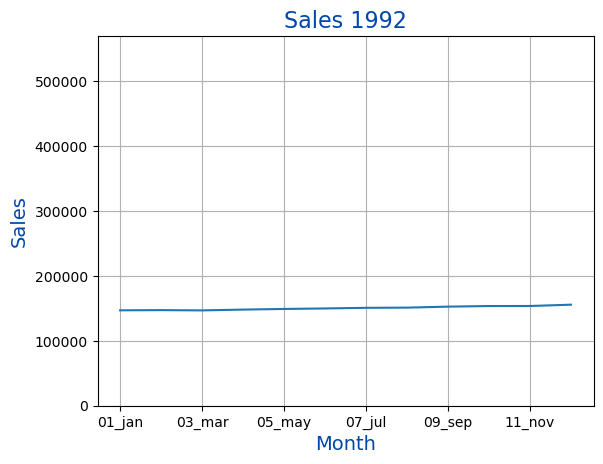

In [33]:
# 08.03.09-01
# task 1 as task 2: Plot the data with proper labeling and make some observations on the graph.
# plot 1992
# set y axis to 0 for context
# plot first year which increased significantly

dt01_tp_drp['1992'].plot()
plt.box(True)
plt.grid(True)
plt.ylim(0, 570000)
plt.ylim(ymin=0)
plt.title('Sales 1992', fontsize=16, color='#0047ab')
plt.xlabel('Month', fontsize=14, color='#0047ab')
plt.ylabel('Sales', fontsize=14, color='#0047ab')
plt.show()

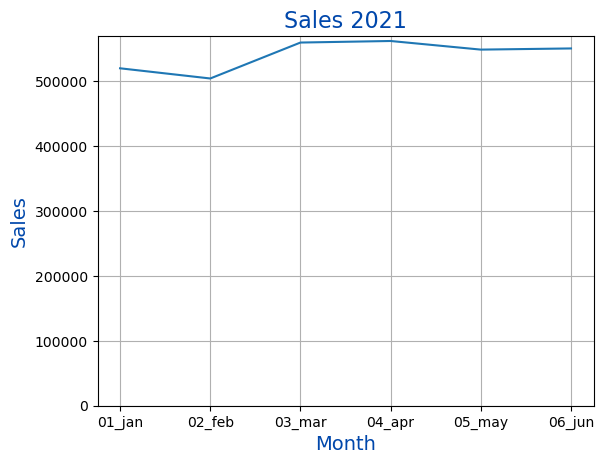

In [34]:
# 08.03.09-02
# task 1 as task 2: Plot the data with proper labeling and make some observations on the graph.
# plot 2021
# set y axis to 0 for context
# plot last year which somewhat fluctuates compared to first year

dt01_tp_drp['2021'].plot()
plt.box(True)
plt.grid(True)
plt.ylim(0, 570000)
plt.title('Sales 2021', fontsize=16, color='#0047ab')
plt.xlabel('Month', fontsize=14, color='#0047ab')
plt.ylabel('Sales', fontsize=14, color='#0047ab')
plt.show()

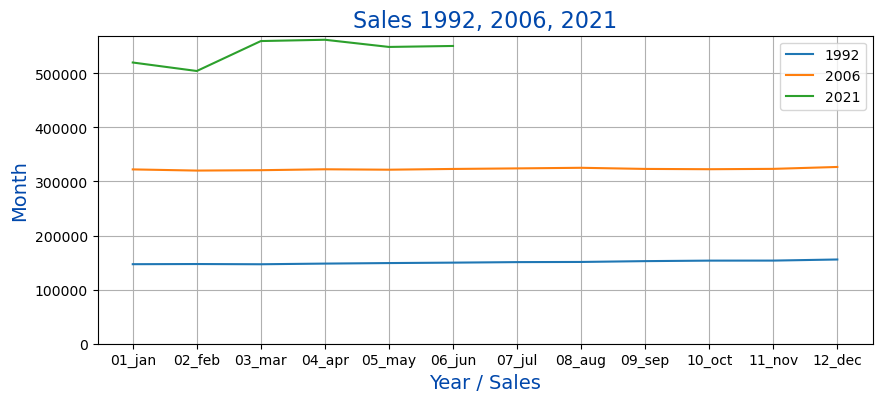

In [35]:
# 08.02.09-03
# task 1 as task 2: Plot the data with proper labeling and make some observations on the graph.
# render plot
# set y axis to 0 for context
# plot three years at an even interval for comparison
# 2021 shows significant fluctuation compared to first and middle

plt.figure(figsize = (10, 4))
plt.box(True)
plt.grid(True)
plt.ylim(0, 570000)
plt.plot(dt01_tp_drp['1992'], label = '1992')
plt.plot(dt01_tp_drp['2006'], label = '2006')
plt.plot(dt01_tp_drp['2021'], label = '2021')
plt.legend()
plt.title('Sales 1992, 2006, 2021', fontsize=16, color='#0047ab')
plt.xlabel('Year / Sales', fontsize=14, color='#0047ab')
plt.ylabel('Month', fontsize=14, color='#0047ab')
plt.show()

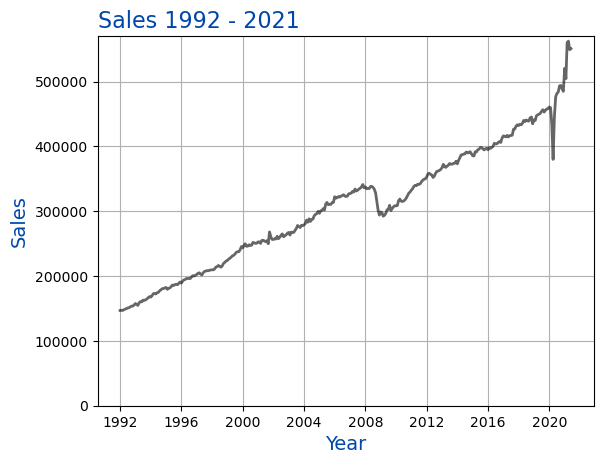

In [36]:
# 08.02.09-04
# task 1 as task 2: Plot the data with proper labeling and make some observations on the graph.
# set y axis to 0 for context
# render line graph
# shows significant fluctuation in 2020

plt.plot(dt01_mlt['Date'], dt01_mlt['value'], color="#000000", alpha=0.6, linewidth=2)
plt.box(True)
plt.grid(True)
plt.ylim(0, 570000)
plt.title('Sales 1992 - 2021', loc='left', fontsize=16, color='#0047ab')
plt.xlabel('Year', fontsize=14, color='#0047ab')
plt.ylabel('Sales', fontsize=14, color='#0047ab')
plt.show()

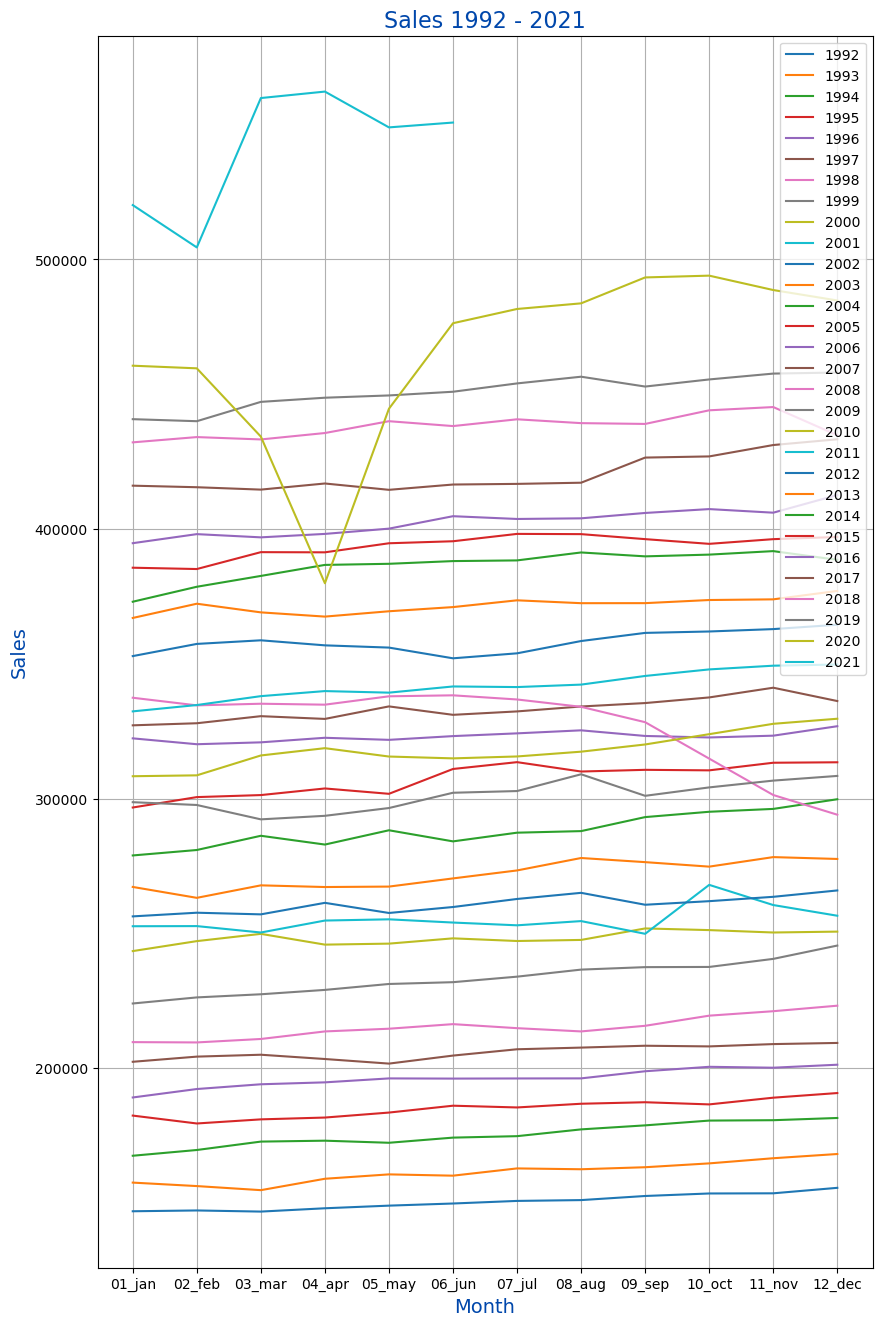

In [37]:
# 08.02.09-05
# task 1 as task 2: Plot the data with proper labeling and make some observations on the graph.
# render plot
# plot shows all variables from 1992 - 2021
# plot reveals gradual increase with significant fluctuation in 2020 and 2021

plt.figure(figsize = (10, 16))
plt.box(True)
plt.grid(True)
plt.plot(dt01_tp_drp['1992'], label = '1992')
plt.plot(dt01_tp_drp['1993'], label = '1993')
plt.plot(dt01_tp_drp['1994'], label = '1994')
plt.plot(dt01_tp_drp['1995'], label = '1995')
plt.plot(dt01_tp_drp['1996'], label = '1996')
plt.plot(dt01_tp_drp['1997'], label = '1997')
plt.plot(dt01_tp_drp['1998'], label = '1998')
plt.plot(dt01_tp_drp['1999'], label = '1999')
plt.plot(dt01_tp_drp['2000'], label = '2000')
plt.plot(dt01_tp_drp['2001'], label = '2001')
plt.plot(dt01_tp_drp['2002'], label = '2002')
plt.plot(dt01_tp_drp['2003'], label = '2003')
plt.plot(dt01_tp_drp['2004'], label = '2004')
plt.plot(dt01_tp_drp['2005'], label = '2005')
plt.plot(dt01_tp_drp['2006'], label = '2006')
plt.plot(dt01_tp_drp['2007'], label = '2007')
plt.plot(dt01_tp_drp['2008'], label = '2008')
plt.plot(dt01_tp_drp['2009'], label = '2009')
plt.plot(dt01_tp_drp['2010'], label = '2010')
plt.plot(dt01_tp_drp['2011'], label = '2011')
plt.plot(dt01_tp_drp['2012'], label = '2012')
plt.plot(dt01_tp_drp['2013'], label = '2013')
plt.plot(dt01_tp_drp['2014'], label = '2014')
plt.plot(dt01_tp_drp['2015'], label = '2015')
plt.plot(dt01_tp_drp['2016'], label = '2016')
plt.plot(dt01_tp_drp['2017'], label = '2017')
plt.plot(dt01_tp_drp['2018'], label = '2018')
plt.plot(dt01_tp_drp['2019'], label = '2019')
plt.plot(dt01_tp_drp['2020'], label = '2020')
plt.plot(dt01_tp_drp['2021'], label = '2021')
plt.legend()
plt.title('Sales 1992 - 2021', fontsize=16, color='#0047ab')
plt.xlabel('Month', fontsize=14, color='#0047ab')
plt.ylabel('Sales', fontsize=14, color='#0047ab')
plt.show()

In [38]:
# 08.02.10-01
# build model
# create column
# assign column variable

dt01_mlt['date_01'] = pd.to_datetime(dt01_mlt['Date'])
dt01_mlt['date_01'] = dt01_mlt['date_01'].map(datetime.toordinal)

In [39]:
# 08.02.11-02
# build model
# create dictionary of months
# assign months to integers

mts = dict(
    JAN = 1, 
    FEB = 2, 
    MAR = 3, 
    APR = 4, 
    MAY = 5, 
    JUN = 6, 
    JUL = 7, 
    AUG = 8, 
    SEP = 9, 
    OCT = 10, 
    NOV = 11, 
    DEC = 12)

In [40]:
# 08.02.11-03
# build model
# assign variable
# create column
# assign column variable

dt01_mlt['Month'] = dt01_mlt['variable'].map(mts)

# 08.02.12
# task 3
# Use the training set to build a predictive model for the monthly retail sales.

In [41]:
# 08.02.12-01
# task 3: Use the training set to build a predictive model for the monthly retail sales.
# build model
# assign variables for training and test data
# 0:341 = 1992 - June 2020
# 342:354 = July 2020 - June 2021

dt01_mlt_trn = dt01_mlt.iloc[0:341]
dt01_mlt_tst = dt01_mlt.iloc[342:354]

In [42]:
# 08.02.12-02
# task 3: Use the training set to build a predictive model for the monthly retail sales.
# build model
# assign variables for training and test data x and y using date and value

dt01_mlt_trn_x = dt01_mlt_trn[['date_01', 'Month']]
dt01_mlt_trn_y = dt01_mlt_trn['value']
dt01_mlt_tst_x = dt01_mlt_tst[['date_01', 'Month']]
dt01_mlt_tst_y = dt01_mlt_tst['value']

In [43]:
# 08.02.12-03
# return first set

print(dt01_mlt_trn_x)

     date_01  Month
0     727198      1
30    727229      2
60    727258      3
90    727289      4
120   727319      5
..       ...    ...
28    737425      1
58    737456      2
88    737485      3
118   737516      4
148   737546      5

[341 rows x 2 columns]


In [44]:
# 08.02.13-01
# task 3: Use the training set to build a predictive model for the monthly retail sales.
# build model
# assign variable for linear regression

dt01_lr = LinearRegression()

In [45]:
# 08.02.12-02
# task 3: Use the training set to build a predictive model for the monthly retail sales.
# build model
# assign variables for training data
# returns variable name error

"""dt01_trn_int_x = np.arange(len(dt01_trn_int)).reshape(1, -1)
dt01_trn_int_y = dt01_trn_int"""

'dt01_trn_int_x = np.arange(len(dt01_trn_int)).reshape(1, -1)\ndt01_trn_int_y = dt01_trn_int'

In [46]:
# 08.02.13-01
# task 3: Use the training set to build a predictive model for the monthly retail sales.
# train model
# predictive model of training and test sets
# forecast of the remainder of 2021
# returns variable name error

"""dt01_lr.fit(dt01_trn_int_x, dt01_trn_int_y)"""

'dt01_lr.fit(dt01_trn_int_x, dt01_trn_int_y)'

In [47]:
# 08.02.13-02
# task 3: Use the training set to build a predictive model for the monthly retail sales.
# fit model

dt01_lr.fit(dt01_mlt_trn_x, dt01_mlt_trn_y)

LinearRegression()

In [48]:
# 08.02.13-03
# task 3: Use the training set to build a predictive model for the monthly retail sales.
# assign variables for test data
# returns variable name error

"""dt01_tst_int_x = np.arange(len(dt01_trn_int), len(dt01_tp_drp)).reshape(1, -1)
dt01_tst_int_y = dt01_tst_int"""

'dt01_tst_int_x = np.arange(len(dt01_trn_int), len(dt01_tp_drp)).reshape(1, -1)\ndt01_tst_int_y = dt01_tst_int'

In [49]:
# 08.02.13-04
# return dimensions

dt01_tp_drp.shape

(12, 30)

# 08.02.14
# task 4
# Use the model to predict the monthly retail sales on the last year of data.

In [50]:
# 08.02.14-01
# task 4: Use the model to predict the monthly retail sales on the last year of data.
# predict model
# assign variable for test prediction

dt01_mlt_pdct = dt01_lr.predict(dt01_mlt_tst_x)

In [51]:
# 08.02.14-02
# predict model
# return predictions

print(dt01_mlt_pdct)

[449165.16373623 450140.45597197 451115.74820772 452062.40506951
 453037.69730526 453984.35416705 453908.49868608 454883.79092182
 455773.1770357  456748.46927145 457695.12613323 458670.41836898]


# 08.02.15
# task 5
# Report the RMSE of the model predictions on the test set.

In [52]:
# 08.02.15-01
# task 5: Report the RMSE of the model predictions on the test set.
# predict model
# assign variable for rmse
# formula for rmse
# calculation of rmse

rmse_01 = metrics.mean_squared_error(dt01_mlt_tst_y, dt01_mlt_pdct)

In [53]:
# 08.02.15-02
# task 5: Report the RMSE of the model predictions on the test set.
# predict model
# return rmse

print(rmse_01)

4464547988.690929


In [54]:
# 08.02.15-03
# task 5: Report the RMSE of the model predictions on the test set.
# predict model
# assign variable for rmse
# formula for rmse
# return rmse
# calculation of rmse

rmse_02 = metrics.mean_squared_error(dt01_mlt_tst_y, dt01_mlt_pdct, squared=False)

In [55]:
# 08.02.15-04
# task 5: Report the RMSE of the model predictions on the test set.
# predict model
# return rmse

print(rmse_02)

66817.27313121158


In [59]:
r2 = dt01_lr.score(dt01_mlt_tst_x, dt01_mlt_tst_y)

In [60]:
r2

-3.68826974198611

In [ ]:
# conclusion:
# attempted two methods: manual conversion (T) and melt for date/time
# analyzed second method
# built a predictive model based on second method
# returned rmse_01 squared of 4464547988.69
# returned rmse_02 of 66817.27 which is too high
# could be due to fluctuation in the data especially in 2020-2021